In [10]:
%matplotlib inline
import numpy as np
import numpy
import pylab
import json
import matplotlib.dates
from pprint import pprint
from datetime import datetime
from matplotlib.dates import date2num, num2date
from pysurvey.plot import setup, line, legend, box, dateticks, hist

In [3]:
data = json.load(open('/Users/ajmendez/data/flickr/stats.json','r'))
print data.keys()[:10]
# pprint(data['2014-07-15'].keys())

[u'saved', u'2015-07-09', u'2015-07-08', u'2015-07-05', u'2015-07-04', u'2015-07-07', u'2015-07-06', u'2015-07-01', u'2015-07-03', u'2015-07-02']


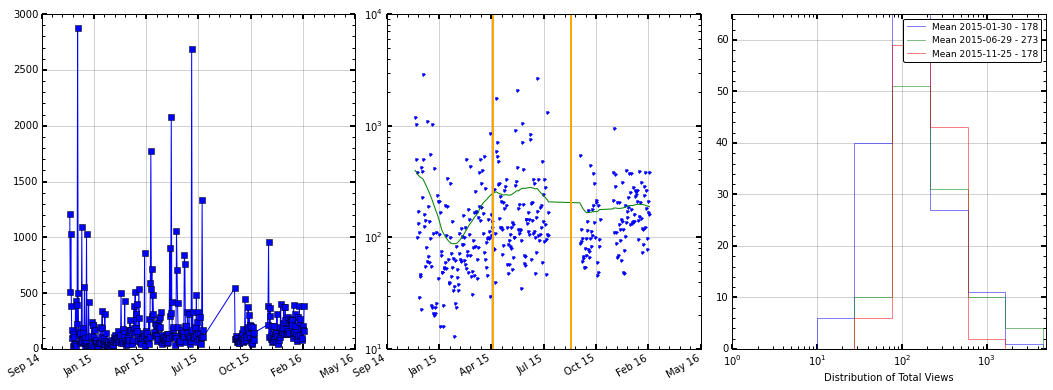

In [11]:
def norm(i,a,b):
    tmp = np.abs(np.arange(a,b)-i)
    tmp = np.max(tmp)-tmp*1.0+1
    tmp /= np.sum(tmp)
    return tmp
def boxcar(x, n=70):
    out = []
    for i in range(len(x)):
        a = i-n/2 if i>(n/2) else 0
        b = i+n/2 if i<(len(x)-n/2) else len(x)-1
        out.append(np.average(x[a:b], weights=norm(i,a,b)))
    return out

keys = sorted([k for k in data.keys() if '-' in k])
dates = [datetime.strptime(k, '%Y-%m-%d') for k in keys]
#x=dates
x = matplotlib.dates.date2num(dates)
y = np.array([data[k]['total'] for k in keys])
z = np.array(boxcar(y))
xbins = np.linspace(np.min(x), np.max(x), 4)



#print sorted(keys)
#print x,y
setup(figsize=(18,6), subplt=(1,3,1))
pylab.plot(x,y, '-s')
dateticks('%b %y')

setup(subplt=(1,3,2), ylog=True)
pylab.plot(x,y, '.')
pylab.plot(x,z, '-')
line(x=xbins[1:-1])
dateticks('%b %y')



setup(subplt=(1,3,3), 
          xr=[1,5000], xlog=True, xlabel='Distribution of Total Views')
for xmin,xmax in zip(xbins, xbins[1:]):
    ii = np.where((x>=xmin) & (x<=xmax))[0]
    hist(y[ii], np.logspace(0,4,10), alpha=0.5, 
             label='Mean {} - {:0.0f}'.format(num2date(np.mean([xmin,xmax])).strftime('%Y-%m-%d'),
                                         np.mean(y[ii])))
legend()
None


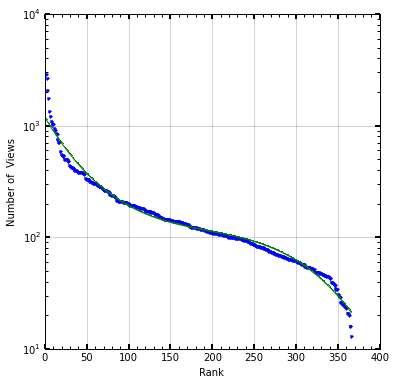

In [12]:
ii = np.argsort(y)
x,y = map(np.array, (x,y))
setup(figsize=(6,6), 
#       xlog=True, xr=[0.9, 400],
      xlabel='Rank',
      ylog=True, 
      ylabel='Number of  Views')
a = np.arange(len(ii),0,-1)
# b = np.log10(y[ii])
b = y[ii]
jj = np.where(b > 0)
pylab.plot(a[jj], b[jj], '.')
tmp = np.polyfit(a[jj], np.log10(b[jj]), 3)
pylab.plot(a[jj], 10**np.poly1d(tmp)(a[jj]), '-,')
# dateticks('%b %y')
None

In [13]:
ii = argmax(y)
print y[ii], dates[ii]
ii = argmin(x)
print y[ii], dates[ii]
ii = argmax(x)
print y[ii], dates[ii]

NameError: name 'argmax' is not defined

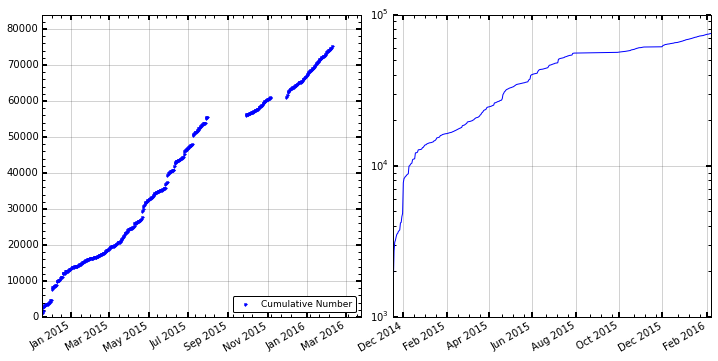

In [16]:
def fitrange(x,y, xr, **kwargs):
    x = date2num(x)
    xr = date2num(xr)
    
    ii = np.where( (x > xr[0]) & (x < xr[1]))[0]
    if len(ii) == 0:
        return
    a,b = np.polyfit(x[ii],y[ii],1)
    z = a*x+b+offset # offset to align data to bulk of points
    tmp = dict(label='Linear fit: m={:0.0f}#/day'.format(a))
    tmp.update(kwargs)
    pylab.plot(dates, z, **tmp)
    box(x=xr, alpha=0.2, zorder=-1)
    

offset = 0 #800
y = [data[k]['total'] for k in keys]
y = np.cumsum(y)

setup(figsize=(12,6), subplt=(1,2,1))

pylab.plot(dates,y, '.', label='Cumulative Number')
setup(embiggeny=[0,0.05])
# fitrange(dates, y, [datetime(2013,11,22), datetime(2014,8,1)])
# fitrange(dates, y, [datetime(2014,2,5), datetime(2014,4,10)])
# fitrange(dates, y, [datetime(2014,4,25), datetime(2014,6,15)])
# fitrange(dates, y, [datetime(2014,6,20), datetime(2014,7,5)])
# fitrange(dates, y, [datetime(2014,7,14), datetime(2014,7,24)])
fitrange(dates, y, [datetime(2014,9,2), datetime(2014,10,1)])
fitrange(dates, y, [datetime(2014,10,30), datetime(2014,11,10)])

# fitrange(dates, y, [datetime(2014,2,5), datetime(2014,2,19)])
# fitrange(dates, y, [datetime(2013,12,15), datetime(2014,1,10)])


legend(loc=4)
setup(embiggenx=[0,0.1])

setup(subplt=(1,2,2), ylog=True)
pylab.plot(dates,y)
# pylab.plot(dates,z)

fig = pylab.gcf()
fig.autofmt_xdate()



[ 26.61184842  23.84714176  17.08414736  60.29409405]


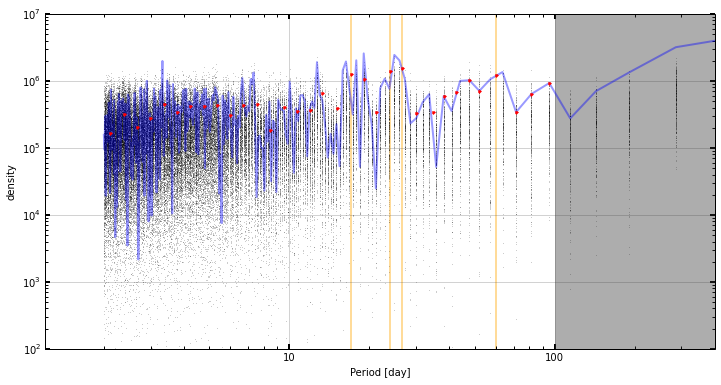

In [15]:
from scipy import signal
x = matplotlib.dates.date2num(dates)
y = np.array([data[k]['total'] for k in keys])

scale = 'density' #'spectrum'
# scale = 'spectrum'
hz = 1.0 # 1.0/(24*60*6)

setup(figsize=(12,6), 
      xlabel='Period [day]', xlog=True,
      xr=[1.2, 400], xtickv=[1,10,100,1000],
      xticknames='1 10 100 1000'.split(),
      ylabel=scale, ylog=True, yr=[100, 1e7])
out = []
for i in range(300):
    ii = np.random.random_integers(0,len(y)-1, int(0.5*len(y)))
    z = np.zeros(len(y))
    z[ii] = y[ii]
    f, Pxx = signal.periodogram(z, hz, scaling=scale)
    out.append(Pxx)
    plot(1/f, Pxx, ',k', alpha=0.2)
sm = np.mean(np.array(out), axis=0)

f, Pxx = signal.periodogram(y, hz, scaling=scale)
plot(1/f, Pxx, color='b', alpha=0.4, lw=2);
# plot(1/f, sm);



c = np.log10(1/f)[1:]
bins = np.linspace(np.min(c), np.max(c), 50)
out = []
for xmin, xmax in zip(bins, bins[1:]):
    ii = np.where( (c >= xmin) & (c <= xmax) & (c <2) )[0]
    out.append([10**np.mean(c[ii]), np.mean(Pxx[1:][ii])])
xx,yy = map(np.array, zip(*out))
plot(xx,yy, '.r');
maxpt = xx[np.argsort(yy)[::-1]]
maxpt = maxpt[np.where(~isnan(maxpt))][:4]
line(x=maxpt, zorder=-1, alpha=0.4)
box([10**2, 10**3], lw=0)
print maxpt

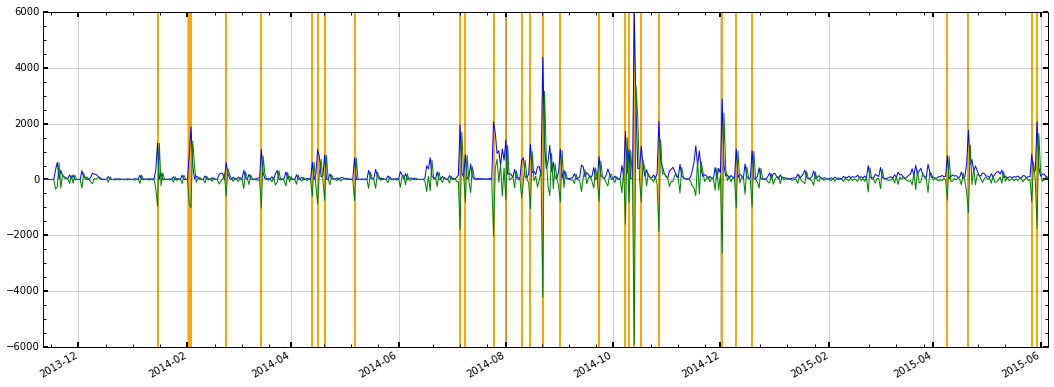

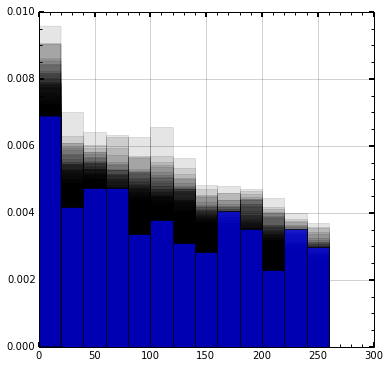

In [16]:

npeak = 30
binrange = 20
niter = 100


setup(figsize=(18,6))
plot(num2date(x),y)
dateticks()
t = np.diff(y)
ii = np.argsort(t)[::-1]

plot(x[1:], -t)
G = x[1:][ii[:npeak]]

# line(x=R, alpha=0.1, color='r')
line(x=G, zorder=-1)
setup(figsize=(6,6))#, xlog=True, ylog=True)
bins = np.arange(0,280,binrange)
# bins = np.logspace(0,2.2,20)
for i in range(niter):
    R = np.random.random(len(G)) * (max(G)-min(G)) + min(G)
    hist(np.abs(np.array([R-r for r in R]).flatten()), bins, normed=True, 
         alpha=0.1, color='k');
hist(np.abs(np.array([G-g for g in G]).flatten()), bins, normed=True, alpha=0.7);
